# Laboratorio: Análisis de Datos con Python

## Parte 1:Numpy

### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [2]:
import numpy as np

array_booleano = np.array([True, False] * 500)

tamanio_bytes = array_booleano.nbytes

print(f"El tamaño del array en bytes es: {tamanio_bytes}")


El tamaño del array en bytes es: 1000


### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [5]:
pares = list(range(2, 101, 2))
pares.sort(reverse=True)
print(f"Los 10 últimos elementos son: {pares[-10:]}")


Los 10 últimos elementos son: [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]


### 3) Dado el array

In [7]:
array = np.array([[2, 4, 5, 6],
                   [0, 3, 7, 4],
                   [8, 8, 5, 2],
                   [1, 5, 6, 1]])

subarray1 = array[1, 1:4]
subarray2 = array[2, [0, 2]]
subarray2 = array[2, [True, False, True, False]]
print(f"Subarray 1: {subarray1}")
print(f"Subarray 2: {subarray2}")

Subarray 1: [3 7 4]
Subarray 2: [8 5]


### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [9]:
import numpy as np

a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

diferencia = a - b
media_aritmetica = np.mean(diferencia)

print(f"La media aritmética de la diferencia es: {media_aritmetica}")

La media aritmética de la diferencia es: -0.25


### 5) Tengo valores de cordenadas (x, y) en las columnas del array

In [11]:
import numpy as np
coordenadas = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

nueva_coordenada = np.array([37.1, -3.6])
coordenadas = np.append(coordenadas, [nueva_coordenada], axis=0)

print(f"Dimensiones del nuevo array: {coordenadas.shape}")
print(f"Nuevo array: \n{coordenadas}")

Dimensiones del nuevo array: (4, 2)
Nuevo array: 
[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


### 6) Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0)

In [12]:
nuevas_coordenadas = np.array([[10.8, 3.0],
                               [35.8, 12.0]])

coordenadas = np.concatenate((coordenadas, nuevas_coordenadas), axis=0)
coordenadas_transpuestas = np.transpose(coordenadas)
print(f"Dimensiones del array transpuesto: {coordenadas_transpuestas.shape}")
print(f"Array transpuesto: \n{coordenadas_transpuestas}")

Dimensiones del array transpuesto: (2, 6)
Array transpuesto: 
[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


# Parte 2: Exploración y Minería de Datos:

## 1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [1]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [10]:
dataset.columns

Index(['FID', 'OBJECTID', 'Texto', 'Poblacion', 'CodMun', 'Municipio',
       'CodProvin', 'Provincia', 'X', 'Y'],
      dtype='object')

In [15]:
conteo_val=dataset[dataset['Poblacion'] > 100000]['Poblacion'].value_counts()
print(conteo_val)

Poblacion
383308.0    1
704198.0    1
206015.0    1
120182.0    1
118441.0    1
           ..
152650.0    1
204120.0    1
110080.0    1
168299.0    1
140184.0    1
Name: count, Length: 62, dtype: int64


## 2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

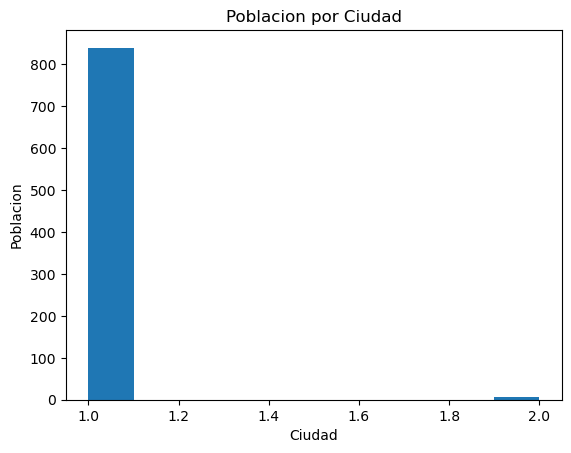

In [41]:
agrupado_ciudad = dataset['Poblacion'].groupby(dataset['Texto']).size()
plt.hist(agrupado_ciudad)

#plt.bar(dataset['Texto'],dataset['Poblacion'])
plt.title("Poblacion por Ciudad")
plt.xlabel('Ciudad')
plt.ylabel('Poblacion')
plt.show()

## 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [58]:
dataExtre = dataset[dataset['Poblacion'] > 5000]
dataExtre

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


## 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [63]:
gran = dataset[dataset['Provincia'] =='Granada']
estadistico = gran['Poblacion'].describe()
estadistico

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64